<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Housing-Prices-Kaggle-data" data-toc-modified-id="Housing-Prices-Kaggle-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Housing Prices Kaggle data</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#System-setup" data-toc-modified-id="System-setup-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>System setup</a></span></li><li><span><a href="#Data-load-and-setup" data-toc-modified-id="Data-load-and-setup-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Data load and setup</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#missing-values" data-toc-modified-id="missing-values-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>missing values</a></span></li><li><span><a href="#Data-viz-EDA" data-toc-modified-id="Data-viz-EDA-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Data viz EDA</a></span></li><li><span><a href="#Outlier-treatement" data-toc-modified-id="Outlier-treatement-1.1.3.3"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>Outlier treatement</a></span></li><li><span><a href="#New-features" data-toc-modified-id="New-features-1.1.3.4"><span class="toc-item-num">1.1.3.4&nbsp;&nbsp;</span>New features</a></span></li><li><span><a href="#K-meansclustering-featuring" data-toc-modified-id="K-meansclustering-featuring-1.1.3.5"><span class="toc-item-num">1.1.3.5&nbsp;&nbsp;</span>K meansclustering featuring</a></span></li></ul></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Piepeline-for-for-pre-processing" data-toc-modified-id="Piepeline-for-for-pre-processing-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Piepeline for for pre processing</a></span></li></ul></li><li><span><a href="#Fit-and-predict" data-toc-modified-id="Fit-and-predict-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Fit and predict</a></span><ul class="toc-item"><li><span><a href="#Random-forestRegressor" data-toc-modified-id="Random-forestRegressor-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Random forestRegressor</a></span></li><li><span><a href="#XBG-Regressor" data-toc-modified-id="XBG-Regressor-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>XBG Regressor</a></span></li><li><span><a href="#Parameter-tuning---grid-search" data-toc-modified-id="Parameter-tuning---grid-search-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Parameter tuning - grid search</a></span></li><li><span><a href="#Linear-regressor" data-toc-modified-id="Linear-regressor-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Linear regressor</a></span></li></ul></li><li><span><a href="#Error-calculation" data-toc-modified-id="Error-calculation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Error calculation</a></span></li></ul></li><li><span><a href="#Submission" data-toc-modified-id="Submission-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Submission</a></span></li><li><span><a href="#Miscellanious" data-toc-modified-id="Miscellanious-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Miscellanious</a></span></li><li><span><a href="#Feature-engineering-and-EDA" data-toc-modified-id="Feature-engineering-and-EDA-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature engineering and EDA</a></span><ul class="toc-item"><li><span><a href="#Mutual-information" data-toc-modified-id="Mutual-information-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Mutual information</a></span></li><li><span><a href="#More-Data-Viz" data-toc-modified-id="More-Data-Viz-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>More Data Viz</a></span></li></ul></li></ul></li><li><span><a href="#End-of-code" data-toc-modified-id="End-of-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>End of code</a></span></li></ul></div>

# Housing Prices Kaggle data

## Setup

### System setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', 50)

In [3]:
import os
cwd = os.getcwd()
mypath = cwd
cwd

'/Users/shivadarul/Desktop/Data Science/Kaggle/Housing_competition'

### Data load and setup

In [4]:
house_data = pd.read_csv('train.csv', index_col = 'Id')

X = house_data.loc[:,~house_data.columns.isin(['SalePrice'])]
y = house_data.SalePrice


### EDA

In [5]:
X.shape

(1460, 79)

#### missing values

In [6]:
missing = house_data.isnull().sum()*100/ house_data.shape[0]
missing_cols = missing[missing.values> 80].index
missing[missing_cols].sort_values()

Fence          80.753425
Alley          93.767123
MiscFeature    96.301370
PoolQC         99.520548
dtype: float64

Dropped columns with more than 80% miss values

In [7]:
X.drop(columns = missing_cols, inplace = True)

/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
missing2 = X.isnull().sum()*100/ X.shape[0]
missing_cols2 = missing2[missing2.values > 0].index
missing2[missing_cols2].sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

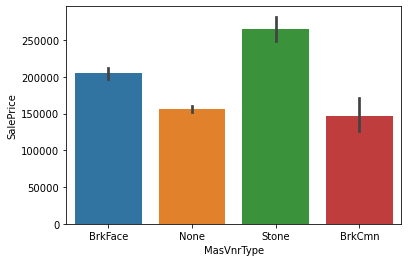

In [9]:
sns.barplot(x= X.MasVnrType, y = y)

In [10]:
X[missing_cols2].select_dtypes(include= 'object')

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,,,,,,
1,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA
2,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
3,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
4,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA
5,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA
1457,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA
1458,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA


In [11]:
X_miss_data_types = X[missing_cols2].dtypes
missing_num_cols = X_miss_data_types[X_miss_data_types.values == 'float64'].index
missing_cat_cols = X_miss_data_types[X_miss_data_types.values == 'object'].index
all_cols = X.columns

X_miss_data_types.value_counts()

object     12
float64     3
dtype: int64

Most categorical variables data is missing because of feature not there for the house

Imputing with None

In [12]:
X.loc[:,missing_cat_cols] = X.loc[:,missing_cat_cols].fillna('None')

/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [13]:
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Data viz EDA

In [14]:
numerical_cols = pd.Series(X.loc[:,~X.columns.isin(['GarageYrBlt','MasVnrArea','LotFrontage'])].select_dtypes(exclude = 'object').columns)
missing_num_cols_median  = ['GarageYrBlt','MasVnrArea']
missing_num_cols_mean= ['LotFrontage']

cat_cols = X.select_dtypes(include = 'object').columns

In [15]:
X[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


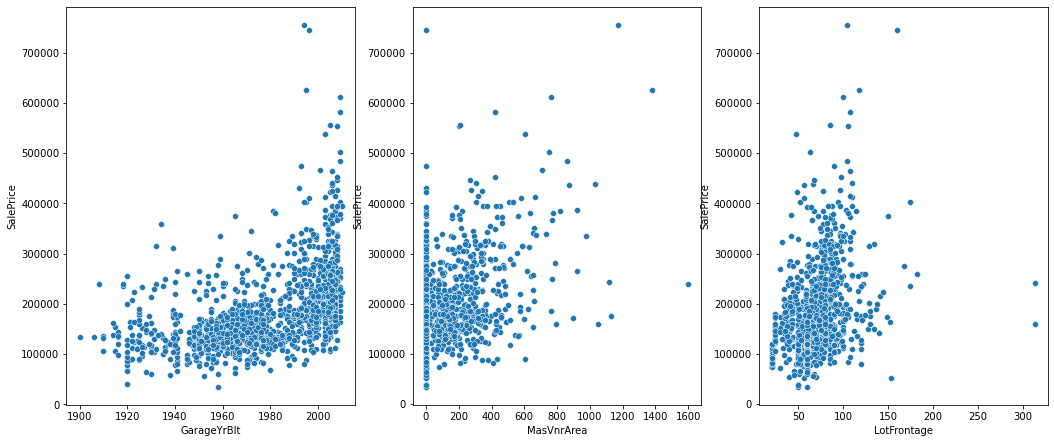

In [16]:
fig = plt.figure(figsize = (30,60))

pos = 1
for i in X[['GarageYrBlt','MasVnrArea','LotFrontage']].columns:
    fig.add_subplot(7,5,pos)
    sns.scatterplot(data= X, x = i, y = y)
    pos+=1

In [17]:
#Defining totasqrfoot as sum of all SF is dropping accuracy?

#X[['totssqrfoot','GrLivArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF']][X.totssqrfoot > 6500] 

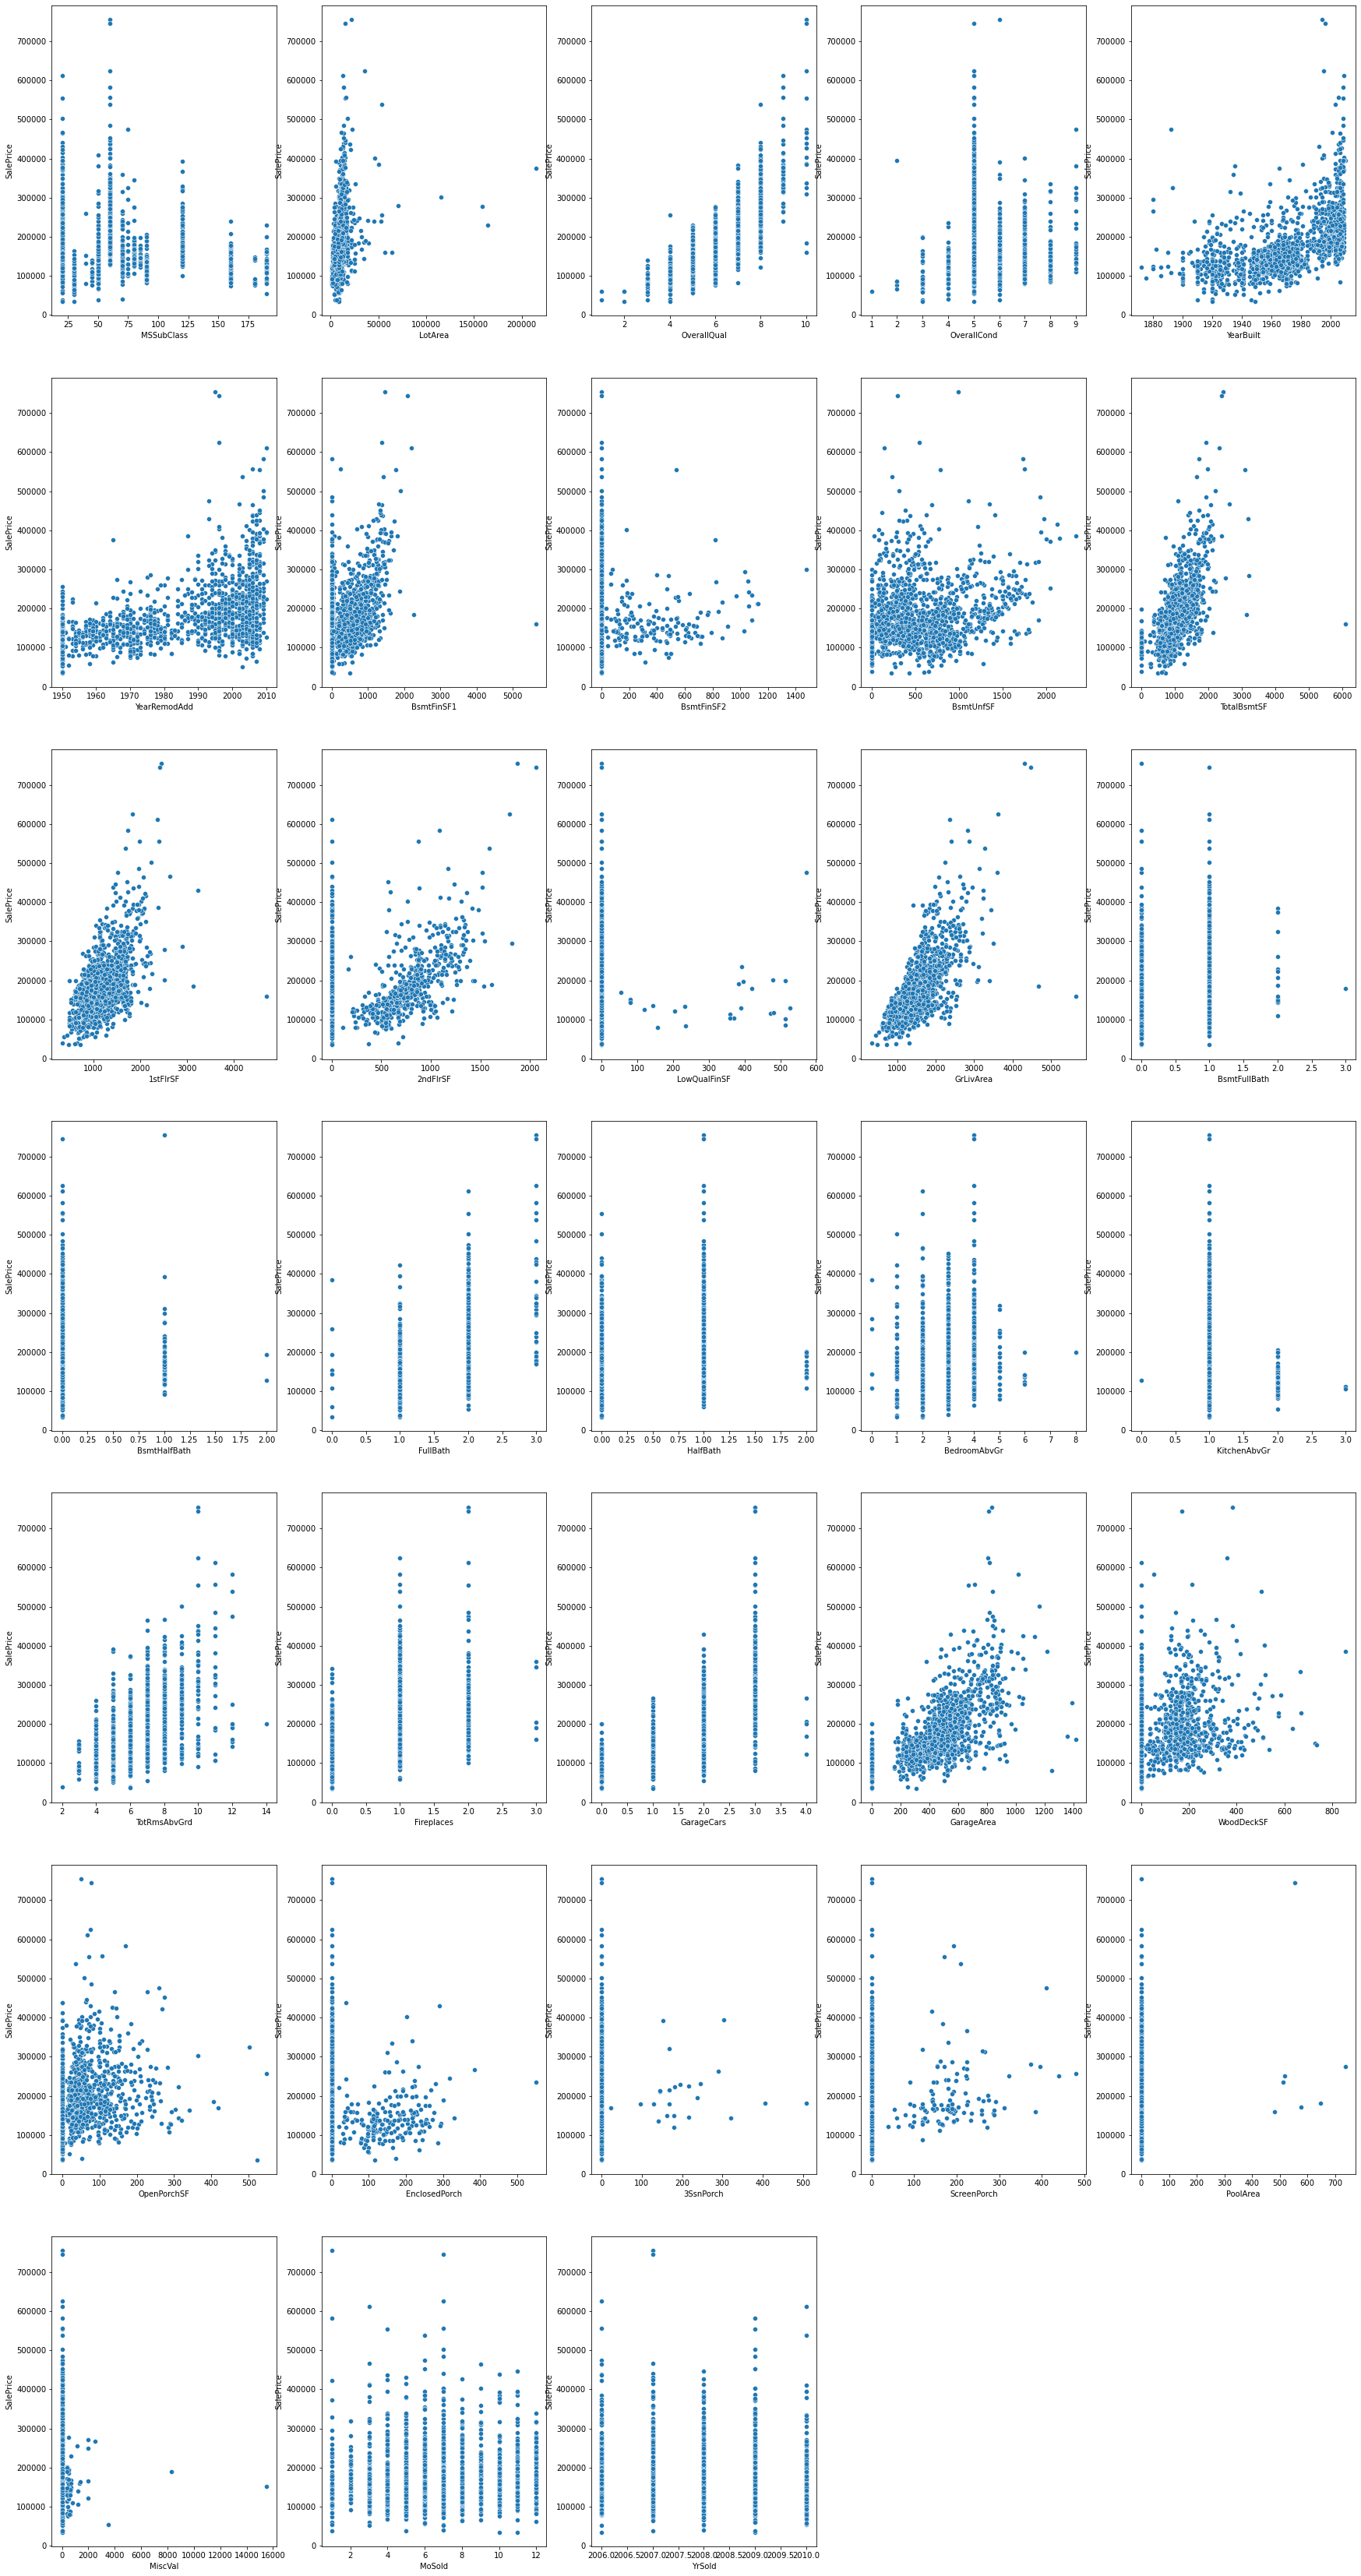

In [18]:
fig = plt.figure(figsize = (30,60))

pos = 1
for i in X[numerical_cols].columns:
    fig.add_subplot(7,5,pos)
    sns.scatterplot(data= X, x = i, y = y)
    pos+=1

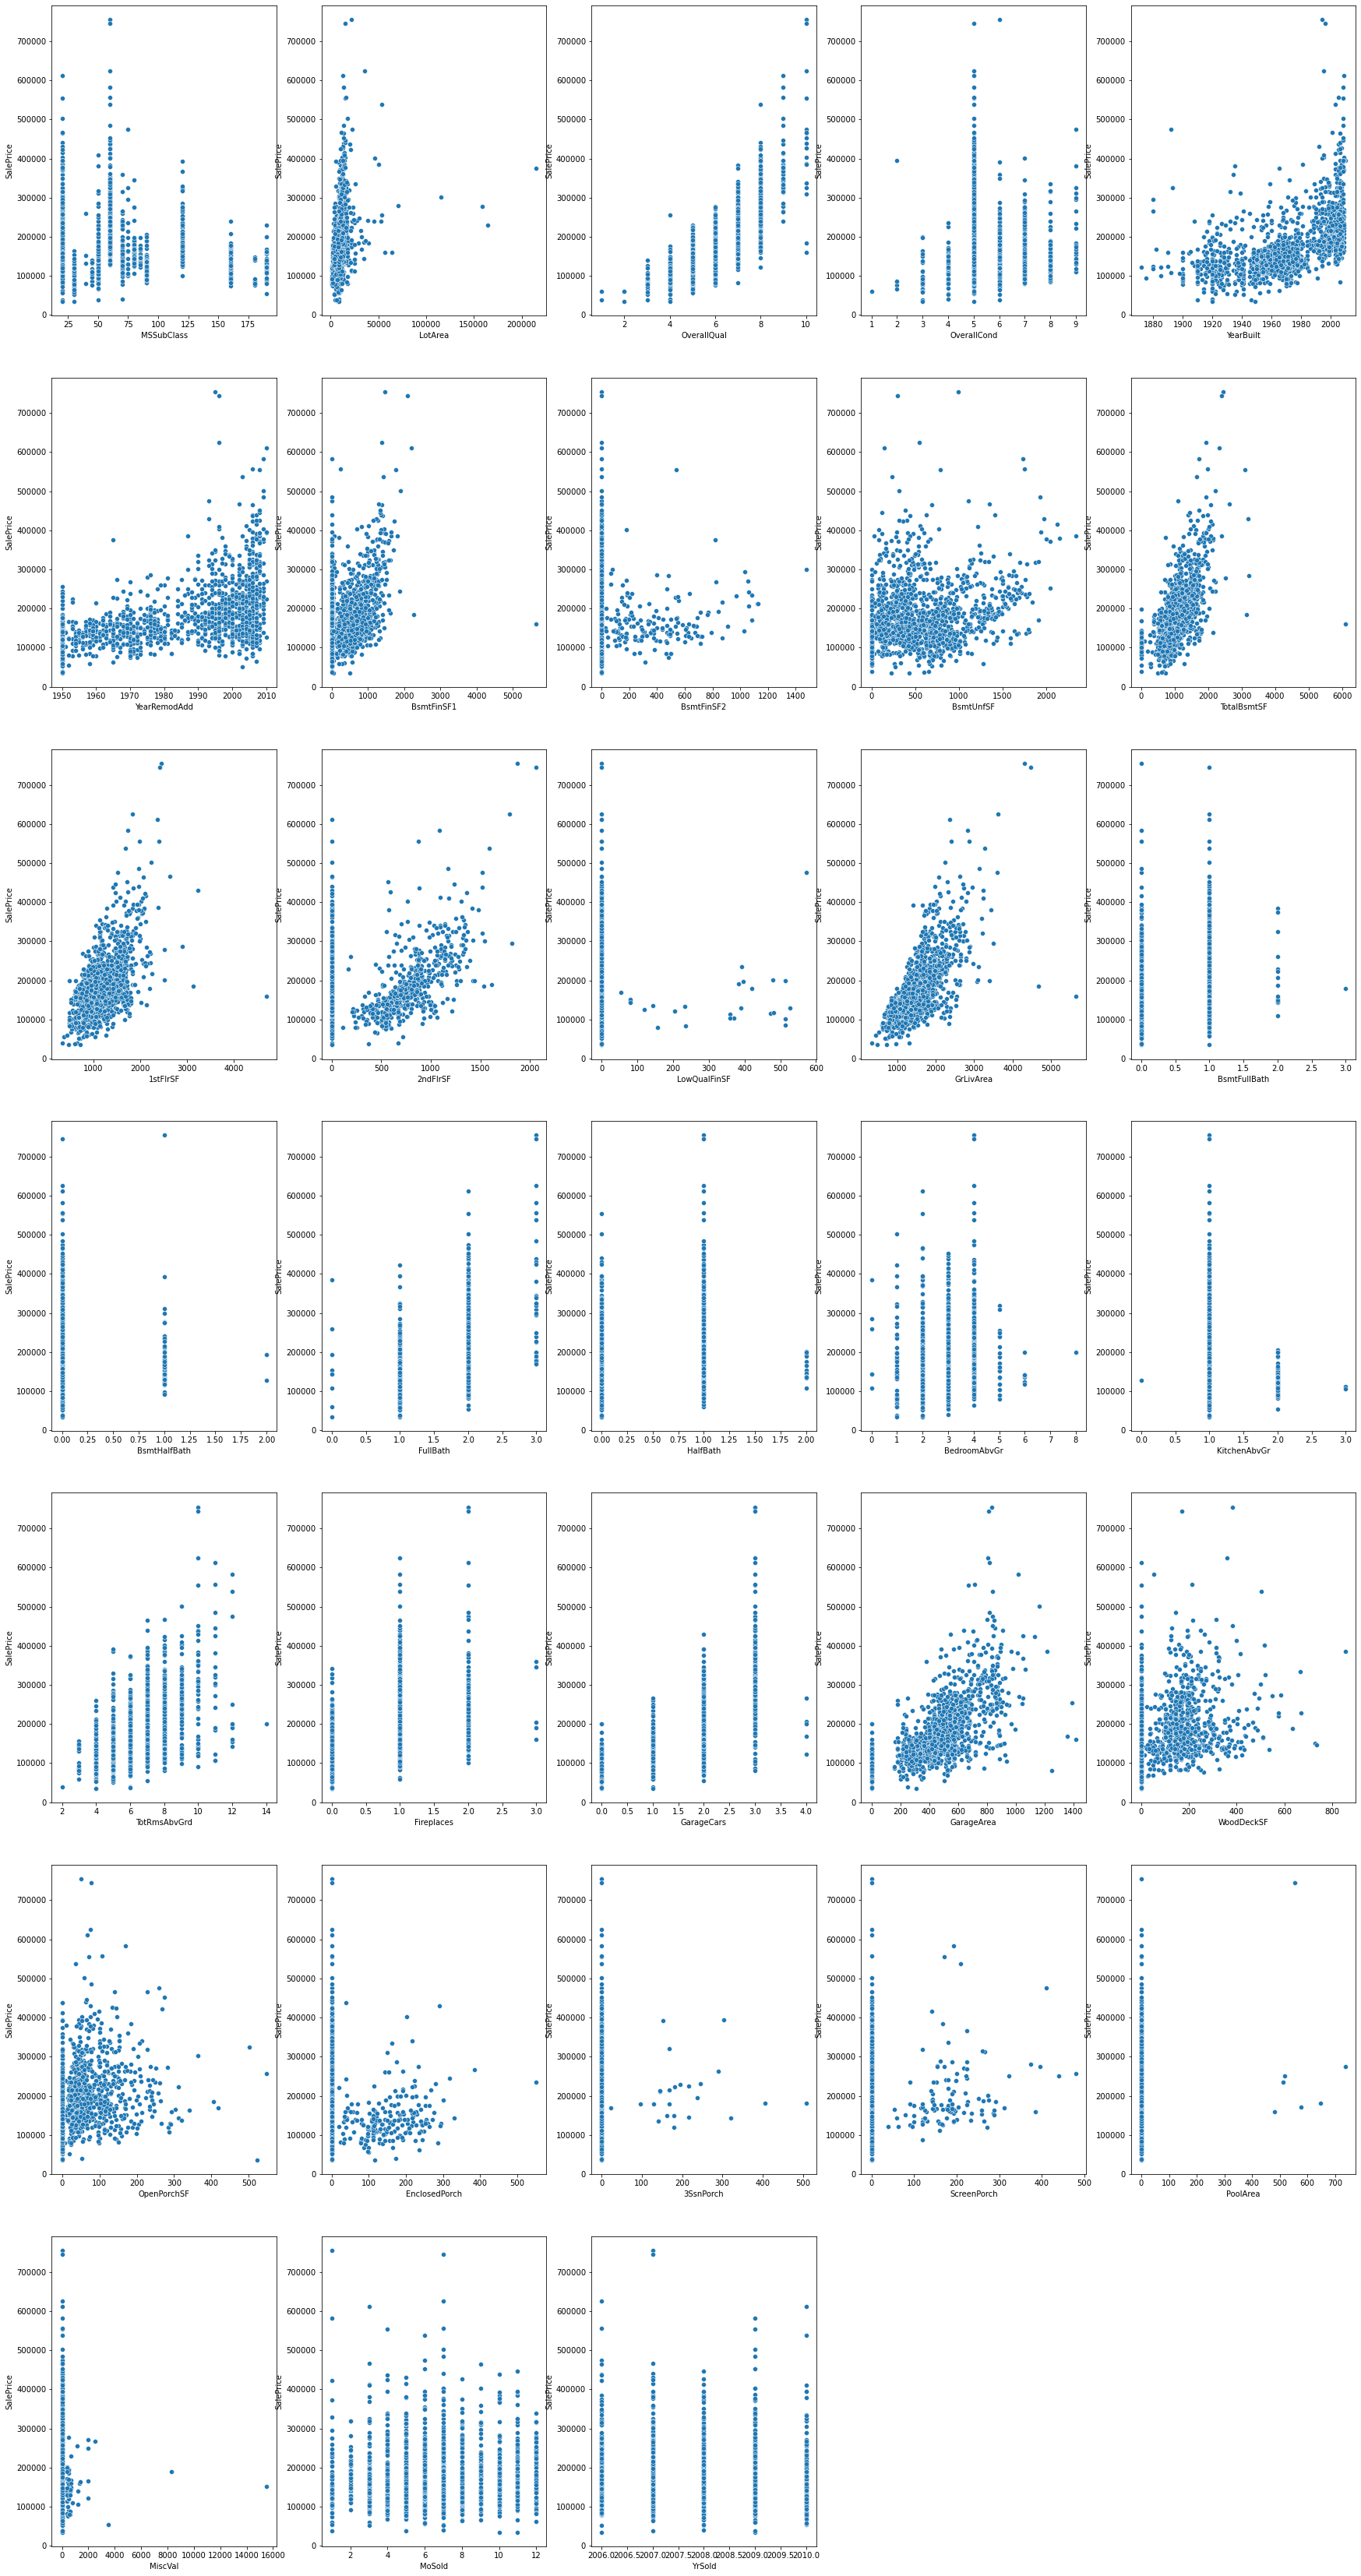

In [19]:
fig = plt.figure(figsize = (30,60))

pos = 1
for i in X[numerical_cols].columns:
    fig.add_subplot(7,5,pos)
    sns.scatterplot(data= X, x = i, y = y)
    pos+=1

##### categorical variables

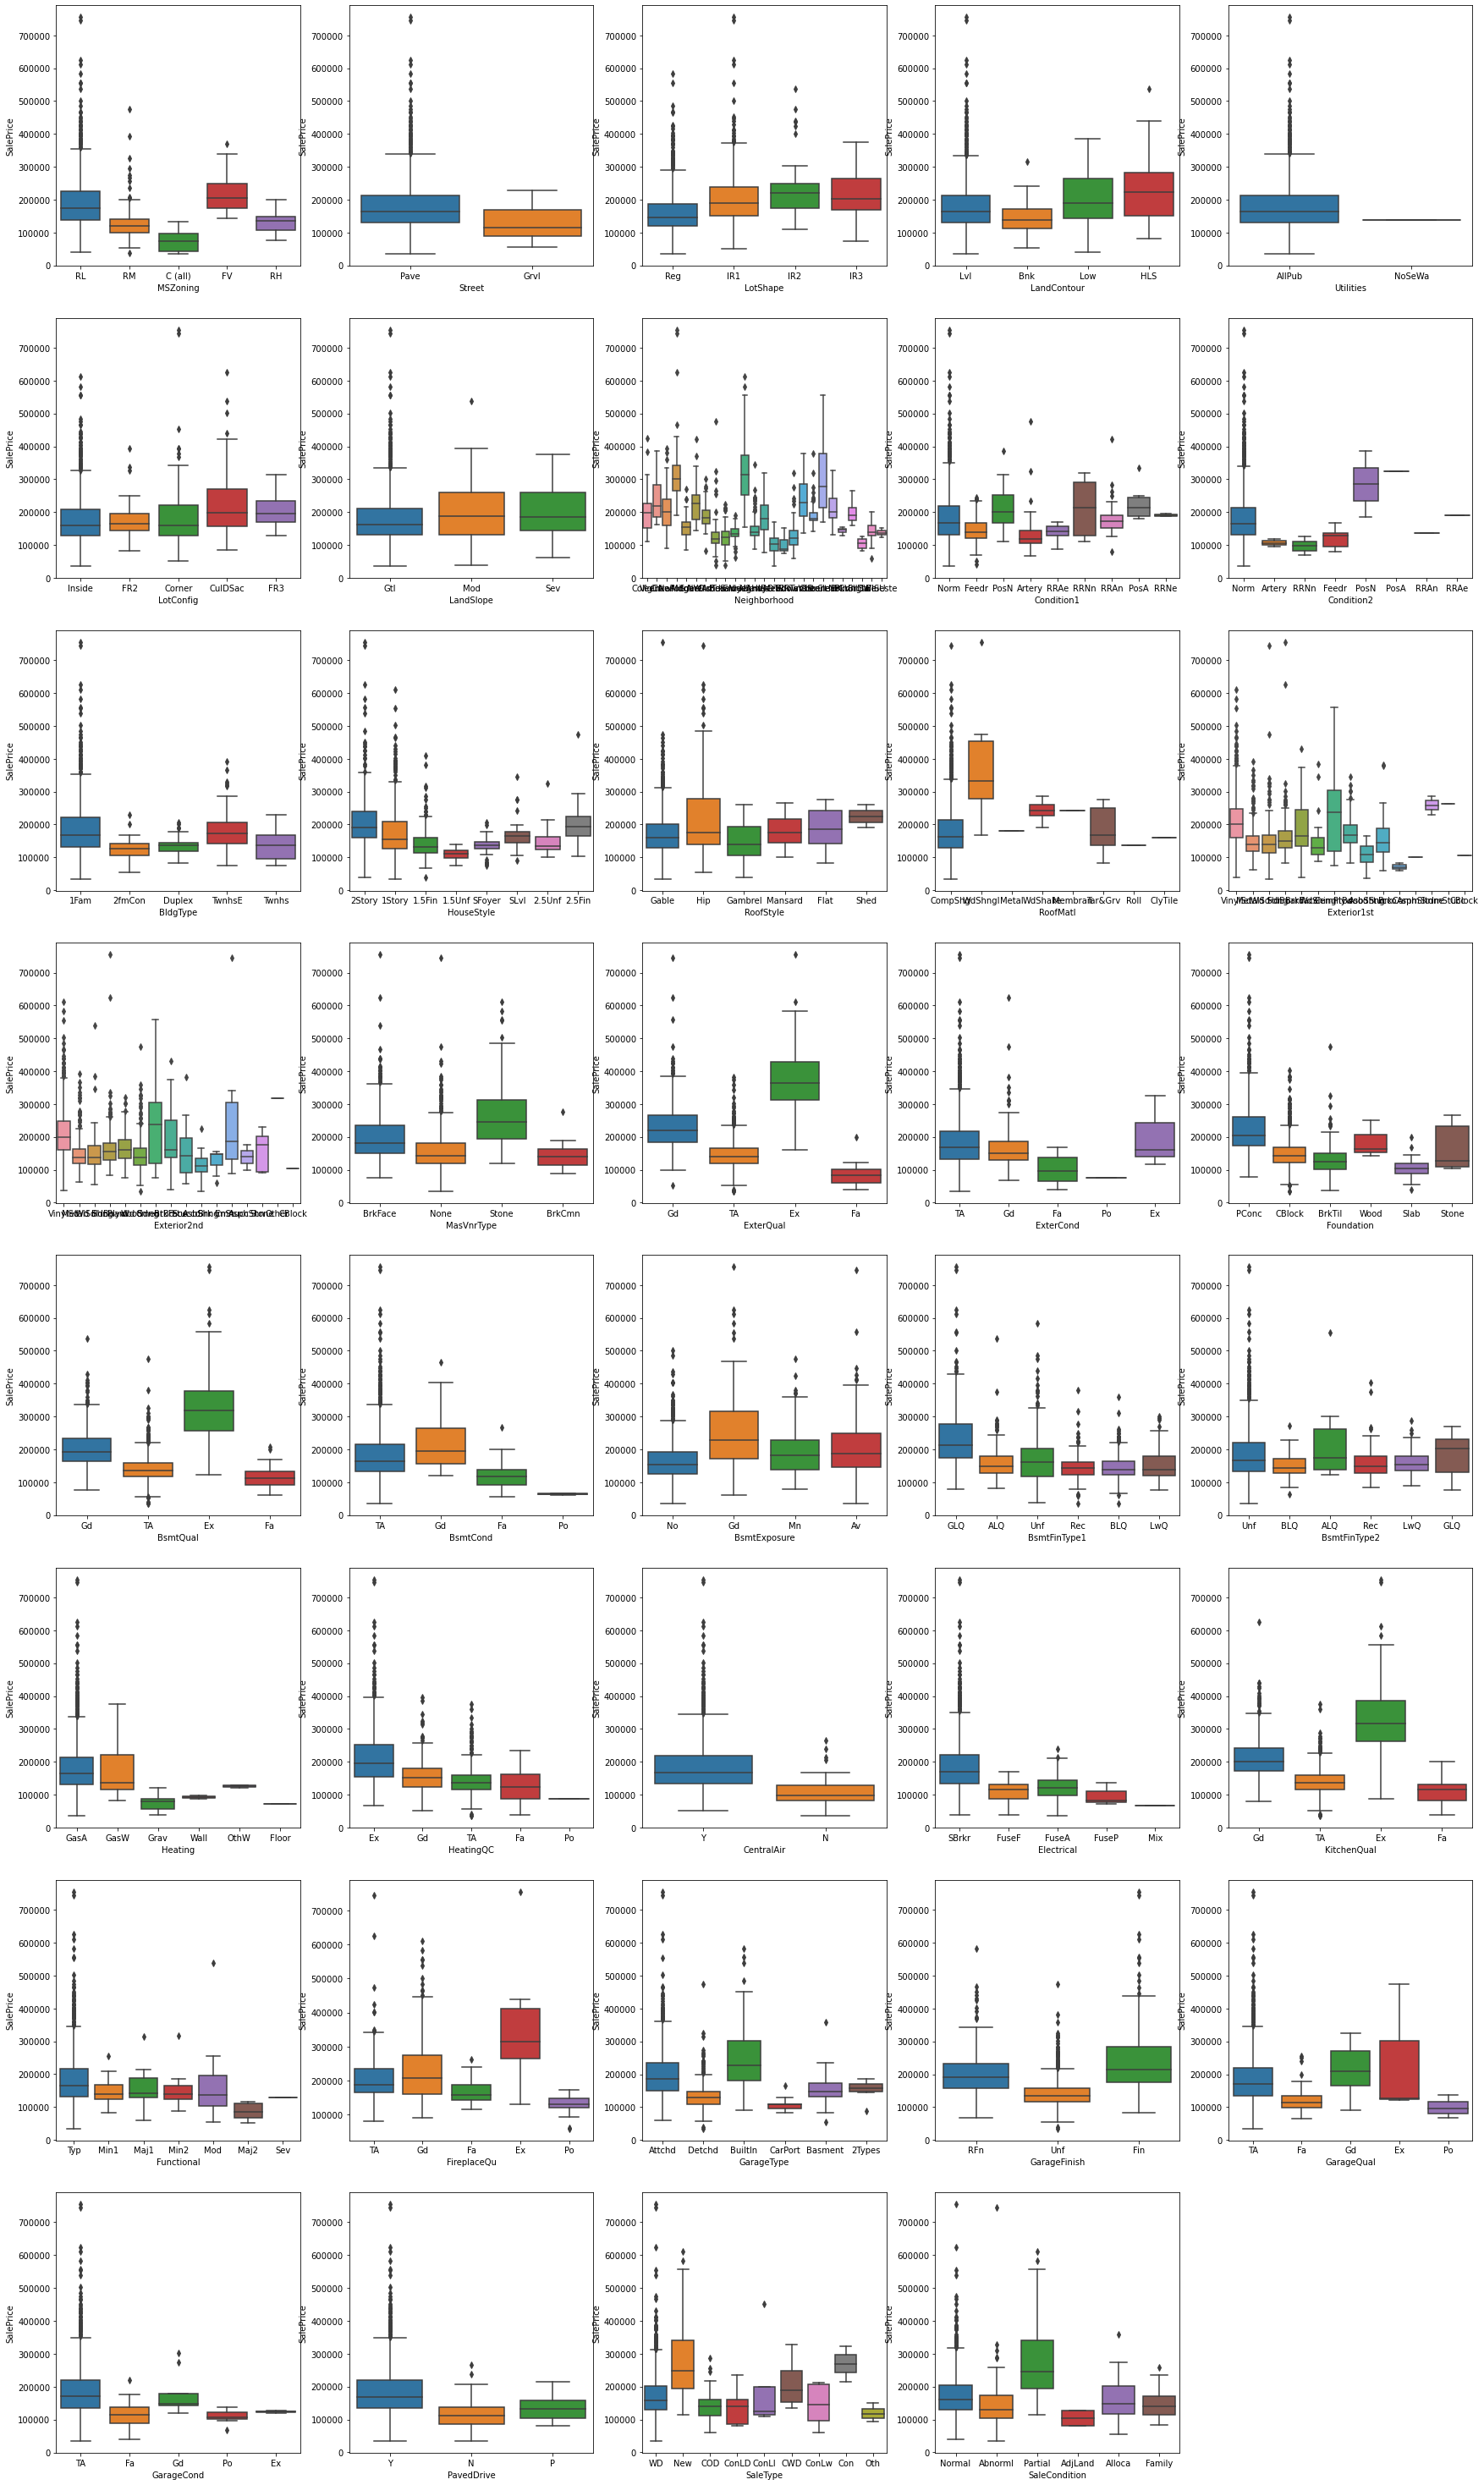

In [20]:
fig = plt.figure(figsize = (30,60))

pos = 1
for i in house_data[cat_cols].columns:
    fig.add_subplot(9,5,pos)
    sns.boxplot(data= house_data, x = i, y = y)
    pos+=1
    
    

#### Outlier treatement

Outlier treatement with 2x 0.95 imputation helped reduce error a little bit
Outlier treatement with 3x 0.95 imputation increased error


In [21]:
def outlier_95(num_col):
    limit  = X[num_col.name].quantile(0.95)
    X[num_col.name].loc[(X[num_col.name] > 2*limit)] = X[num_col.name].mean()


X[numerical_cols].apply(outlier_95)

#### New features

In [23]:
# adding this column reduces accuracy, tree is taking time on this and losing out on other?

# X['sold_yrmo'] = X.YrSold.astype(str).str.cat(X.MoSold.astype(str))
#X.drop(columns = 'sold_yrmo', inplace = True)

# somehow this has is a better indicator than total area across basemnet and floor
X['totssqrfoot'] = X['2ndFlrSF'] + X['1stFlrSF']

<ipython-input-23-ef0e54b39fd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['totssqrfoot'] = X['2ndFlrSF'] + X['1stFlrSF']


#### K meansclustering featuring

Finding it difficult to actually use K means effectively

In [238]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [239]:
X_cluster = X[['OverallQual','GrLivArea','YearBuilt']]
min_max = MinMaxScaler()

min_max.fit(X_cluster)
X_cluster2 = pd.DataFrame(min_max.transform(X_cluster))
X_cluster2.columns = X_cluster.columns


In [26]:
sns.scatterplot( x = error[2:100], y = k[2:100])

NameError: name 'error' is not defined

In [ ]:
error  = []
k = range(3,51)


for i in range(3,51):
    k_cluster = KMeans(n_clusters = i, n_init = 10)
    X_cluster2['cluster'] =  k_cluster.fit_predict(X_cluster2)
    error.append(k_cluster.inertia_)


In [ ]:

i = 9
k_cluster = KMeans(n_clusters = i, n_init = 10)
X_cluster2['cluster'] =  k_cluster.fit_predict(X_cluster2)
error.append(k_cluster.inertia_)


In [ ]:
X_cluster['cluster'] = X_cluster2.cluster
X_cluster.head(5)

In [ ]:
sns.distplot(X_cluster.YearBuilt, kde = False)

In [ ]:
X_cluster.groupby('cluster').YearBuilt.mean()

In [ ]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize = (20,20))

sns.relplot(x = 'GrLivArea', y = 'YearBuilt',hue = 'cluster',  data = X_cluster)

In [ ]:
house_data.select_dtypes(exclude = 'object').columns

## Model building

#### Piepeline for for pre processing

In [24]:
#important_cols = pd.concat([important_int_cols, pd.Series(important_cat_cols),pd.Series(['GarageYrBlt','MasVnrArea','LotFrontage'])], axis = 0)

all_cols = X.columns


In [25]:
#X_train, X_valid, y_train, y_valid = train_test_split(X[important_cols], y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:

median_impute = SimpleImputer(strategy = 'median')
mean_impute = SimpleImputer(strategy = 'mean')
onehot = OneHotEncoder(handle_unknown = 'ignore', sparse = False)


numerical_cols = pd.Series(X_train.loc[:,~X_train.columns.isin(['GarageYrBlt','MasVnrArea','LotFrontage'])].select_dtypes(exclude = 'object').columns)
missing_num_cols_median  = ['GarageYrBlt','MasVnrArea']
missing_num_cols_mean= ['LotFrontage']


cat_cols = X_train.select_dtypes(include = 'object').columns
cat_impute = SimpleImputer(strategy =  'constant', fill_value = 'None')
category_treat = Pipeline(steps = [('replace_none', cat_impute), ('one_hot', onehot)])


In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_mean', mean_impute, missing_num_cols_mean),
        ('num_medain', median_impute, missing_num_cols_median),
        ('num_mean2', mean_impute, numerical_cols),
        ('onehot',category_treat, cat_cols)
    ])



preprocessor.fit(X_train)



ColumnTransformer(transformers=[('num_mean', SimpleImputer(), ['LotFrontage']),
                                ('num_medain', SimpleImputer(strategy='median'),
                                 ['GarageYrBlt', 'MasVnrArea']),
                                ('num_mean2', SimpleImputer(),
                                 0        MSSubClass
1           LotArea
2       OverallQual
3       OverallCond
4         YearBuilt
5      YearRemodAdd
6        BsmtFinSF1
7        BsmtFinSF2
8         BsmtUnfSF
9       TotalBsmtSF
10         1stFlrSF
11         2ndFlrSF
12     LowQualFinSF
13        GrLivArea
14     BsmtFullBa...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQu

In [29]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
0,90.000000,2007.0,452.0,20.0,11694.0,9.0,5.0,2007.0,2007.0,48.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60.000000,1962.0,0.0,20.0,6600.0,5.0,5.0,1962.0,1962.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.000000,1921.0,0.0,30.0,13360.0,5.0,7.0,1921.0,2006.0,713.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,69.614017,2002.0,148.0,20.0,13265.0,8.0,5.0,2002.0,2002.0,1218.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,118.000000,2001.0,150.0,20.0,13704.0,7.0,5.0,2001.0,2002.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,82.000000,1999.0,673.0,60.0,9430.0,8.0,5.0,1999.0,1999.0,1163.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,60.000000,1996.0,0.0,20.0,9600.0,4.0,7.0,1950.0,1995.0,442.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,68.000000,1978.0,0.0,90.0,8930.0,6.0,5.0,1978.0,1978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,69.614017,2003.0,18.0,120.0,3196.0,7.0,5.0,2003.0,2004.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train = pd.DataFrame(preprocessor.transform(X_train))
X_valid = pd.DataFrame(preprocessor.transform(X_valid))


In [31]:
get_feature_names(preprocessor)

NameError: name 'get_feature_names' is not defined

### Fit and predict

#### Random forestRegressor

In [ ]:
n_estimators = 500
max_depth = 18

my_model = RandomForestRegressor(random_state = 0, n_jobs = 4, max_depth = i)
my_model.fit(X_train, y_train)
scores = my_model.predict(X_valid)
print(mean_absolute_error(scores, y_valid)," ",mean_absolute_error(my_model.predict(X_train), y_train))


feature importance

In [ ]:
RF_varimp = pd.DataFrame(X_train.columns,my_model.feature_importances_).reset_index()
RF_varimp.columns = ['varimp','feature_number']
RF_varimp2

In [ ]:
plt.figure(figsize = (15,10))
RF_varimp2 = RF_varimp[RF_varimp.varimp > RF_varimp.varimp.quantile(0.9)].sort_values(by = 'varimp', ascending = False)

sns.barplot(y = 'varimp',  x = 'feature_number', data = RF_varimp2)

In [ ]:
missing_num_cols_mean,missing_num_cols_median,numerical_cols

#### XBG Regressor

In [245]:
from xgboost import XGBRegressor

In [246]:
reg_lambda = 2.5
max_depth = 5

my_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs = 4,
                     max_depth = 5, reg_lambda = 2.5, booster = 'gbtree')
my_model2.fit(X_train, y_train, 
         early_stopping_rounds=5, 
         eval_set=[(X_valid, y_valid)], 
         verbose=False)

scores2 = my_model2.predict(X_valid)
#XGB Regressor
print(i, " ", mean_absolute_error(scores2, y_valid)," ", mean_absolute_error(my_model2.predict(X_train), y_train))

SaleCondition   15802.004227311643   6587.024250187286


In [247]:
RF_varimp = pd.DataFrame(X_train.columns,my_model2.feature_importances_).reset_index()
RF_varimp.columns = ['varimp','feature_number']

<AxesSubplot:xlabel='feature_number', ylabel='varimp'>

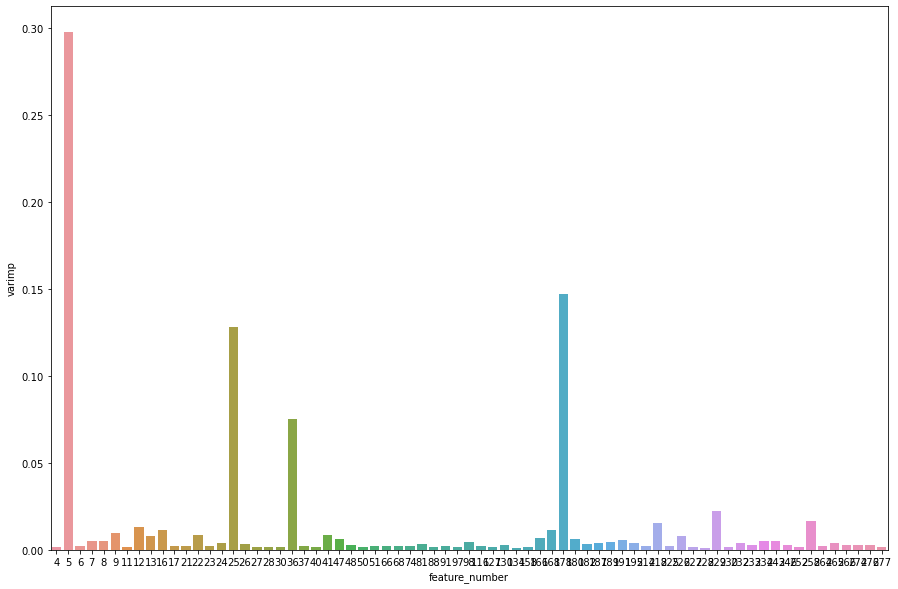

In [248]:
plt.figure(figsize = (15,10))
RF_varimp2 = RF_varimp[RF_varimp.varimp > RF_varimp.varimp.quantile(0.75)].sort_values(by = 'varimp', ascending = False)

sns.barplot(y = 'varimp',  x = 'feature_number', data = RF_varimp2)

In [200]:
X_train2 = X_train.iloc[:][RF_varimp2.feature_number]
X_valid2 = X_valid.iloc[:][RF_varimp2.feature_number]

Training with selected features from feature importance increases accuracy drastically.
Is this by chance?

In [249]:
reg_lambda = 2.5
max_depth = 5

my_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs = 4,
                     max_depth = 5, reg_lambda = 2.5, booster = 'gbtree')
my_model2.fit(X_train2, y_train, 
         early_stopping_rounds=5, 
         eval_set=[(X_valid2, y_valid)], 
         verbose=False)

scores2 = my_model2.predict(X_valid2)
#XGB Regressor
print(i, " ", mean_absolute_error(scores2, y_valid)," ", mean_absolute_error(my_model2.predict(X_train2), y_train))

SaleCondition   15308.73100385274   6063.036932122218


#### Parameter tuning - grid search

In [99]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


baseline model

In [108]:

my_model = XGBRegressor()

my_model.fit(X_train, y_train, early_stopping_rounds=5, 
         eval_set=[(X_valid, y_valid)], 
         verbose=False)

scores = my_model.predict(X_valid)
#XGB Regressor
print(i, " ", mean_absolute_error(scores, y_valid)," ", mean_absolute_error(my_model.predict(X_train), y_train))

SaleCondition   17593.376899614726   5572.537460536173


parameter tuning

In [76]:
#xgb_space = {'min_child_weight' : [0,1,2,3,5,10,15], 'gamma' : np.arange(0.1,1,0.1).tolist()}
xgb_space = {'n_estimators' : [100,200,1000], 'max_depth' : [3,4,5], 'min_child_weight' : [1,2,3]}


In [ ]:
search = GridSearchCV(my_model, xgb_space, n_jobs = -1)
search.fit(X_train,y_train)
search.best_estimator_, search.best_parameter_

hypertuned parameters - gives slight increase in error reduction

In [125]:

my_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3 , monotone_constraints='()',
             n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

my_model.fit(X_train, y_train, early_stopping_rounds=5, 
         eval_set=[(X_valid, y_valid)], 
         verbose=False)

scores = my_model.predict(X_valid)
#XGB Regressor
print(i, " ", mean_absolute_error(scores, y_valid)," ", mean_absolute_error(my_model.predict(X_train), y_train))

SaleCondition   15836.57191780822   5938.870103809932


#### Linear regressor

In [261]:
from sklearn.linear_model import LinearRegression

my_model3 = LinearRegression()
my_model3.fit(X_train, y_train)
scores3 = my_model3.predict(X_valid)
#Linear Regression
mean_absolute_error(scores3, y_valid),  mean_absolute_error(my_model3.predict(X_train), y_train) 



(125022072.51050965, 12550.133563041687)

In [262]:
from sklearn.linear_model import Ridge

In [263]:
alpha = 50

my_model3_2 = Ridge(alpha = 50)
my_model3_2.fit(X_train, y_train)
scores3_2 = my_model3_2.predict(X_valid)
#Linear Regression
print(i," ",mean_absolute_error(scores3_2, y_valid)," ", mean_absolute_error(my_model3_2.predict(X_train), y_train))


SaleCondition   18415.549115518872   14476.084928939881


In [267]:
help(my_model3_2)

Help on Lasso in module sklearn.linear_model._coordinate_descent object:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` 

In [264]:
from sklearn.linear_model import Lasso

my_model3_2 = Lasso(alpha = 50)
my_model3_2.fit(X_train, y_train)
scores3_2 = my_model3_2.predict(X_valid)
#Linear Regression
print(i," ",mean_absolute_error(scores3_2, y_valid)," ", mean_absolute_error(my_model3_2.predict(X_train), y_train))


SaleCondition   18918.474775622075   13366.028061670286


/Users/shivadarul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288179204045.876, tolerance: 719132949.9230078
  model = cd_fast.enet_coordinate_descent(


In [265]:
linear_regress_coeffs = pd.Series(my_model3.coef_)
    
lwr = linear_regress_coeffs.quantile(0.05)
higher = linear_regress_coeffs.quantile(0.95)

linear_regress_coeffs[(linear_regress_coeffs.values<lwr)|(linear_regress_coeffs.values>higher) ]

13     1.898014e+13
14     1.898014e+13
36    -1.898014e+13
44     3.361284e+10
45     3.361285e+10
46     3.361286e+10
47     3.361284e+10
54     1.420671e+11
55     1.420671e+11
56     1.420671e+11
57     1.420671e+11
58     1.420671e+11
102   -4.004761e+10
103   -4.004760e+10
104   -4.004761e+10
105   -4.004761e+10
106   -4.004761e+10
167    2.799598e+10
168    2.799598e+10
170    2.799598e+10
171    2.799598e+10
248   -4.474942e+10
249   -1.373180e+11
250   -4.493112e+10
251   -1.373180e+11
252   -1.373179e+11
256   -4.493112e+10
265   -1.477203e+10
266   -1.477204e+10
267   -1.477203e+10
dtype: float64

### Error calculation

In [ ]:
#Random forest
mean_absolute_error(scores, y_valid), mean_absolute_error(my_model.predict(X_train), y_train) 

In [ ]:
#XGB Regressor

mean_absolute_error(scores2, y_valid) , mean_absolute_error(my_model2.predict(X_train), y_train) 

In [ ]:
#Linear Regression

mean_absolute_error(scores3, y_valid),  mean_absolute_error(my_model3.predict(X_train), y_train) 

## Submission

In [250]:
house_test_data = pd.read_csv('test.csv', index_col = 'Id')

house_test_data.shape

(1459, 79)

In [251]:
index_save = house_test_data.index
index_save

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [252]:
house_test_data['totssqrfoot'] = house_test_data['2ndFlrSF'] + house_test_data['1stFlrSF']

In [256]:
house_test_data = pd.DataFrame(preprocessor.transform(house_test_data[all_cols]))

In [257]:
house_test_data = house_test_data.iloc[:][RF_varimp2.feature_number]
X_train2.shape, house_test_data.shape

((1168, 71), (1459, 71))

In [258]:
final_scores = pd.DataFrame(my_model2.predict(house_test_data))

In [259]:
final_scores.index = index_save
final_scores = final_scores.reset_index()
final_scores.columns = ['Id','SalePrice']

In [260]:
final_scores.to_csv('submission10.csv', index=False)

## Miscellanious

In [ ]:
sns.catplot(data = pd.DataFrame(y_train), kind = 'boxen')

In [ ]:
sns.catplot(data = pd.DataFrame(final_scores.SalePrice), kind = 'boxen')

## Feature engineering and EDA

### Mutual information

Choosing only top features from MI and using it with XGB did not help with accuracy, In fact accuracy dropped - mostly from the loss of information from variables (either good variable missed by MI or missing multiple 'ok' variables)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
house_data.select_dtypes(include = 'float64').columns

In [ ]:
miss = house_data.isnull().sum()
df_missss = miss[miss.values > 0]*100/house_data.shape[0]
df_missss.sort_values()

In [ ]:
miss = house_data.isnull().sum()
house_data2 = X.dropna(axis = 1)

num_cols = house_data2.select_dtypes(exclude='object').columns
num_discrete_cols = house_data2.select_dtypes(include='int').columns

house_data2 = house_data2[num_cols]
num_discrete_cols = house_data2.dtypes == int

In [ ]:
mi_Scores = mutual_info_regression(house_data2, y)

mi_df = pd.DataFrame(house_data2.columns, mi_Scores).reset_index()
mi_df.columns = ['mi_score','col_name']
mi_df = mi_df.sort_values(by = 'mi_score', ascending = False)

In [ ]:
plt.figure(figsize = (20,20))

sns.barplot(y = 'col_name' , x = 'mi_score', data = mi_df[mi_df.mi_score > 0.01])


In [ ]:
important_int_cols = mi_df[mi_df.mi_score > 0.01].col_name

In [ ]:
miss = house_data.isnull().sum()

house_data3 = pd.get_dummies(X[cat_cols])
house_data3 = house_data3.dropna(axis = 1)

num_discrete_cols = house_data3.select_dtypes(include='int').columns


In [ ]:
mi_Scores2 = mutual_info_regression(house_data3, y)

mi_df2 = pd.DataFrame(house_data3.columns, mi_Scores2).reset_index()
mi_df2.columns = ['mi_score','col_name']
mi_df2 = mi_df2.sort_values(by = 'mi_score', ascending = False)

In [ ]:
important_cat_cols = mi_df2['col_name'][mi_df2.mi_score > 0.01].str.split(pat ='_', expand = True)
important_cat_cols = important_cat_cols[0].unique()
house_data[important_cat_cols]

### More Data Viz

In [ ]:
len(cat_cols)

In [ ]:
sns.boxplot(x = house_data.OverallQual, y = y)

Looks like we can cluster quality variables  - but it might give me something very similar to overallQual

Another option is to club features like outdoor/indoor or garage related variables etc

In [ ]:
fig2 = plt.figure(figsize = (40,50))

pos = 1
for i in cat_cols:
    fig2.add_subplot(5,4,pos)
    sns.boxplot(x = X[i], y = y )
    pos+=1


In [ ]:
fig2 = plt.figure(figsize = (40,50))

pos = 1
for i in cat_cols:
    fig2.add_subplot(5,4,pos)
    sns.boxplot(x = X[i], y = X.OverallQual )
    pos+=1


In [ ]:
sns.histplot(x = log(house_data.SalePrice))



In [ ]:
testing = abs(scores2 -  y_valid)

In [ ]:
sns.histplot(x = testing[testing > 0])

In [ ]:
testing[(testing > 0) & (testing < 350000)].mean(), testing.mean()

In [ ]:
testing[testing > 350000]

In [ ]:
testing = pd.DataFrame(scores2, y_valid).reset_index()
testing.columns = ['pred','actual']

In [ ]:
sns.lmplot(x = 'pred', y =  'actual', data = testing )

In [ ]:
scores2_ser.shape

In [ ]:
testing = [house_data['2ndFlrSF'] + house_data['1stFlrSF']]

In [ ]:

fig = plt.figure(figsize = (15,7))


# ax.set_xlim(0,3000)
# ax.set_ylim(0,3000)

fig.add_subplot(2,2,1)

sns.scatterplot(x = '1stFlrSF' , y = 'SalePrice', data = house_data)

fig.add_subplot(2,2,2)
sns.scatterplot(x = '2ndFlrSF' , y = 'SalePrice', data = house_data)

fig.add_subplot(2,2,3)
sns.scatterplot(x = house_data['2ndFlrSF'] + house_data['1stFlrSF'] , y = 'SalePrice', data = house_data)



In [ ]:
house_data.Bedroom

In [ ]:
sns.boxplot(x = house_data.YrSold, y = house_data.SalePrice)

In [ ]:
house_data.HouseStyle

In [ ]:
sns.boxplot(x = house_data.TotRmsAbvGrd, y = house_data.SalePrice)

 Ratio of rooms to bathroom did not work

In [ ]:
room_to_bath_ratio = round(house_data.TotRmsAbvGrd / house_data.FullBath)
room_to_bath_ratio

In [ ]:

fig = plt.figure(figsize = (8,20))

test


testing3 = testing1.str.cat(testing2)


sns.boxplot(y = testing3, x = house_data.SalePrice)

In [ ]:
testing1 = house_data.YrSold.astype(str)
testing2 = house_data.MoSold.astype(str)


In [ ]:
house_data[['HouseStyle','MSSubClass']].head(20)

# End of code